# Self-Organizing Maps (SOM)

In [2]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img = plt.imread('imagens/LooneyTunes.png')

In [4]:
# reformulação da matriz de pixels
pixels = np.reshape(img, (img.shape[0]*img.shape[1],3))

In [5]:
# treinamento
som = MiniSom(20,30,3,sigma=2.,learning_rate=0.1, 
              neighborhood_function='bubble', topology='hexagonal')
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()
som.train_random(pixels, 1000)

# Quantização 
qnt = som.quantization(pixels)

# construindo a nova imagem
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):
    clustered[np.unravel_index(i, img.shape[:2])] = q

/Users/giuliana/Desktop/GitHub/fiap-deeplearning/venv/lib/python3.10/site-packages/minisom.py:540: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


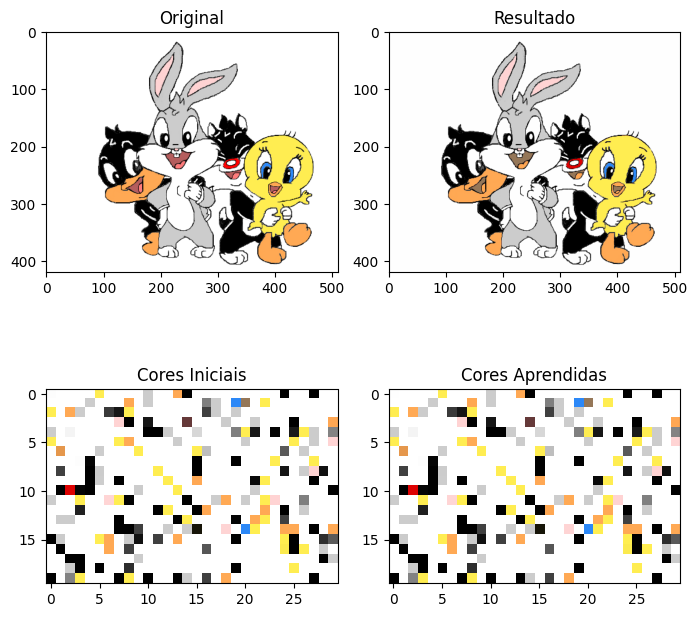

In [6]:
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('Original')
plt.imshow(img)
plt.subplot(222)
plt.title('Resultado')
plt.imshow(clustered)

plt.subplot(223)
plt.title('Cores Iniciais')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('Cores Aprendidas')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()